# Importar el dataset

In [39]:
# Your code here

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.to_csv("../data/raw/total_data.csv", index = False)

print(total_data.shape)

total_data.info()



(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

Hay 48895 filas y 16 columnas.

Las columnas "last_review" y "reviews_per_month" tienen unos 10 mil valores nulos.

##### Variables numéricas:
- latitude , longitude , price , minimun_nights , number of reviews , reviews_per_month , calculated_host_listings_count

##### Variables categóricas:
- id , name , host_id , host_name , neighbourhood_group , neighbourhood , room_type , last_review , availability_365


# Eliminar duplicados

In [40]:
if total_data.drop("id", axis = 1).duplicated().sum() > 0:
    total_data.drop_duplicates(subset = total_data.columns.difference(['id']))

print(total_data.shape)

(48895, 16)


Asumiendo "id" como clave primaria, no hay ningún duplicado

# Eliminar información irrelevante

El id, el name, host_name se eliminan por, en principio, no aportar nada a una posible predicción.

last_review y reviews_per_month se eliminan por tener demasiados valores nulos.

In [41]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [42]:
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


# Paso 3: Análisis de variables univariante

## Variables categóricas

- host_id , neighbourhood_group , neighbourhood , room_type , availability_365

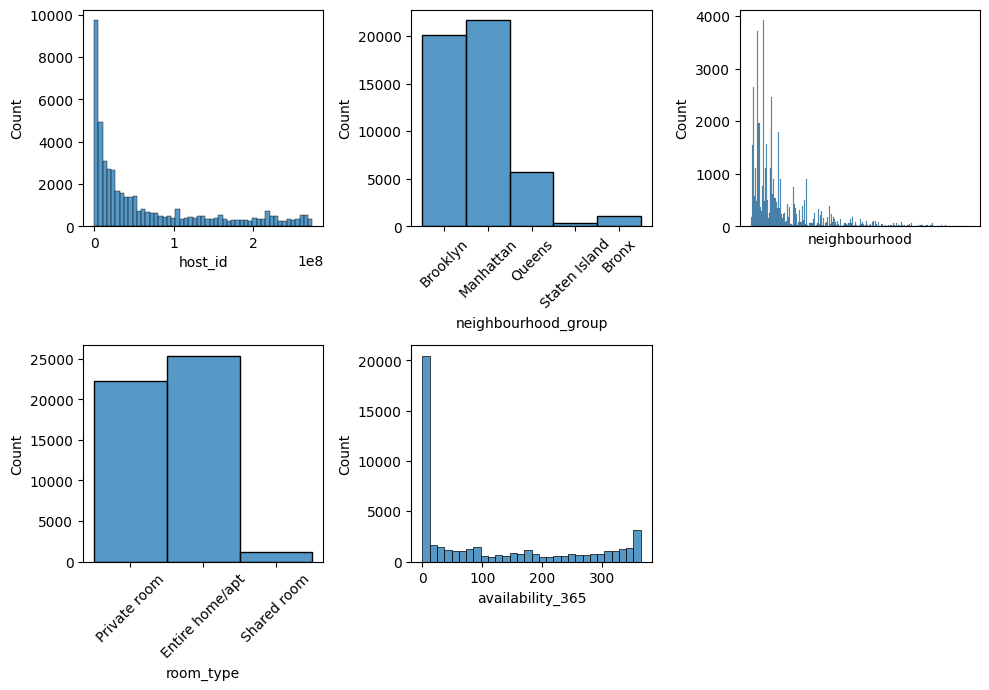

In [43]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

unique_values_neighbourhood_group = total_data["neighbourhood_group"].unique()
unique_values_room_type = total_data["room_type"].unique()

sns.histplot(ax = axis[0, 0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood_group")
axis[0, 1].set_xticks(unique_values_neighbourhood_group) 
axis[0, 1].set_xticklabels(unique_values_neighbourhood_group, rotation=45)
sns.histplot(ax = axis[0, 2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type")
axis[1, 0].set_xticks(unique_values_room_type)
axis[1, 0].set_xticklabels(unique_values_room_type, rotation=45)
sns.histplot(ax = axis[1, 1], data = total_data, x = "availability_365")

fig.delaxes(axis[1, 2])

plt.tight_layout()

plt.show()

- Los hosts con un id "menor" tienen más propiedades que los hosts con un id "mayor"
- Hay 5 grupos de vecindarios, y Brooklyn y Manhattan son los 2 que más alojamientos tienen mientras que Staten Island el que menos
- Hay muchos vecindarios y la gráfica es asimétrica, los de la sección izquierda ofrecen muchos más alojamientos (es posible que pertenezcan a Manhattan y a Brooklyn pero eso se analizará más adelante)
- Hay 3 tipos de alojamientos: los 2 más habituales son habitaciones privadas y apartamentos/casas enteros.
- Hay muchos alojamientos disponibles 0 días y luego el grupo más numeroso es el de disponibilidad 365 días al año. 

## Variables numéricas
- latitude , longitude , price , minimum_nights , number_of_reviews , calculated_host_listings_count

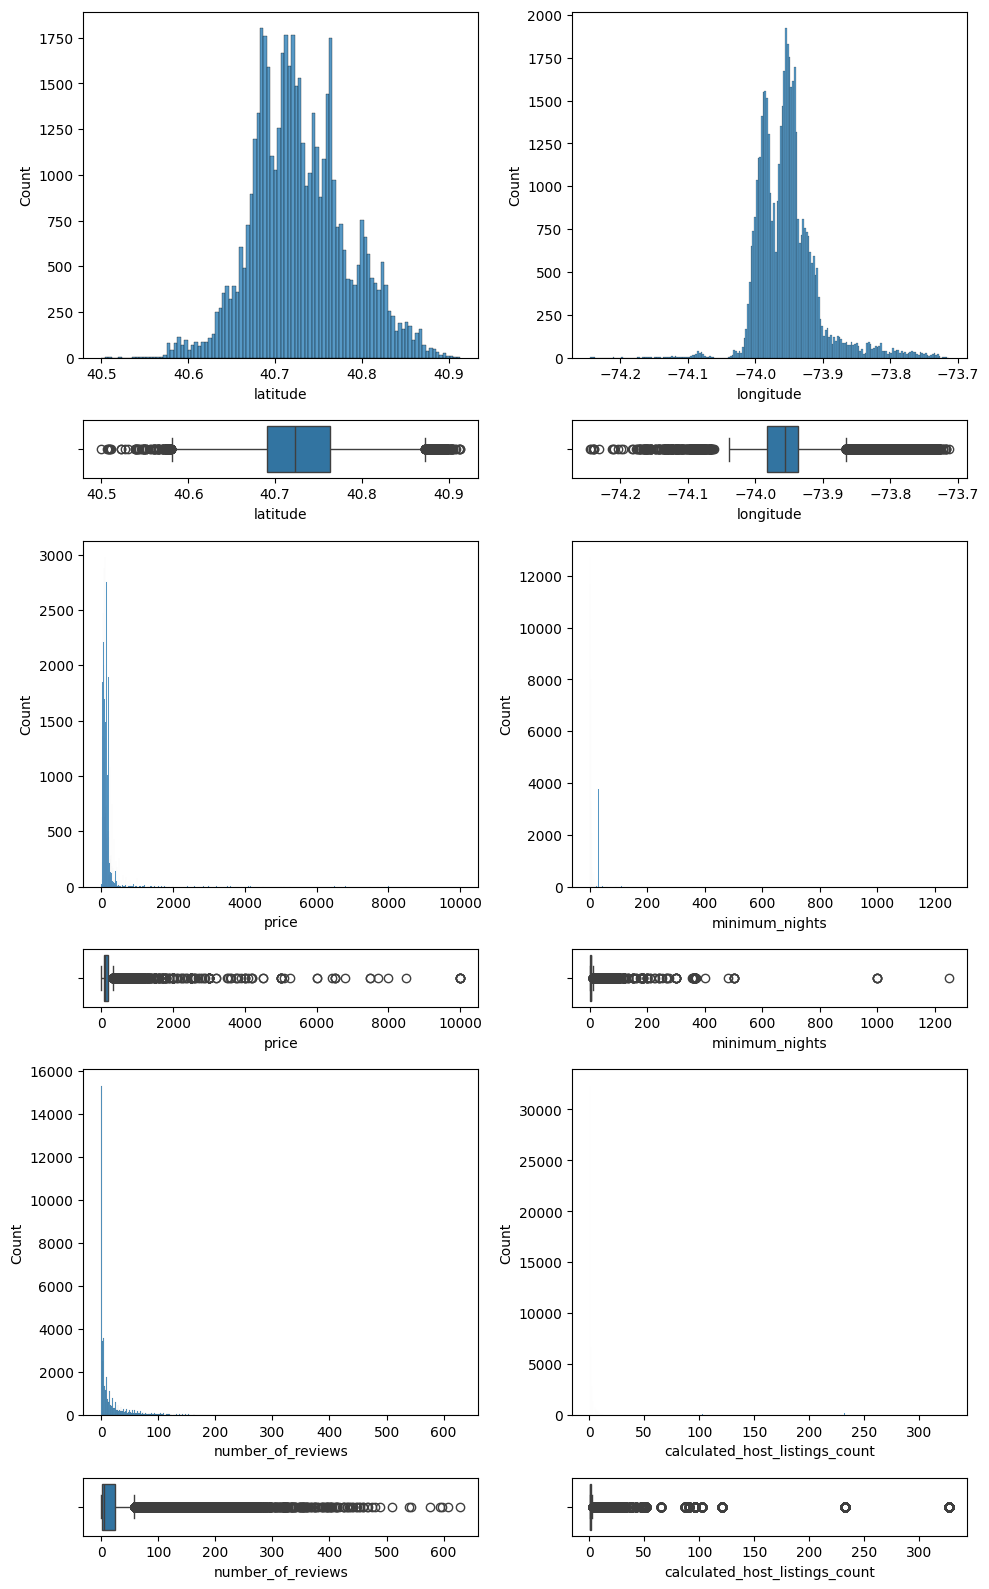

In [44]:
fig, axis = plt.subplots(6, 2, figsize=(10, 16), gridspec_kw={"height_ratios": [6, 1] * 3})

sns.histplot(ax=axis[0, 0], data=total_data, x="latitude")
sns.boxplot(ax=axis[1, 0], data=total_data, x="latitude")

sns.histplot(ax=axis[0, 1], data=total_data, x="longitude")
sns.boxplot(ax=axis[1, 1], data=total_data, x="longitude")

sns.histplot(ax=axis[2, 0], data=total_data, x="price")
sns.boxplot(ax=axis[3, 0], data=total_data, x="price")

sns.histplot(ax=axis[2, 1], data=total_data, x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=total_data, x="minimum_nights")

sns.histplot(ax=axis[4, 0], data=total_data, x="number_of_reviews")
sns.boxplot(ax=axis[5, 0], data=total_data, x="number_of_reviews")

sns.histplot(ax=axis[4, 1], data=total_data, x="calculated_host_listings_count")
sns.boxplot(ax=axis[5, 1], data=total_data, x="calculated_host_listings_count")

plt.tight_layout()

plt.show()


- El precio más habitual está por debajo de 100 pero hay mucha dispersión.
- Lo más habitual es que el número mínimo de noches sea 1 pero también tiene mucha dispersión.
- El número de reseñas más habitual estimo que estará entre 1 y 40. Lo más habitual probablemente sea un número entre 4 y 10, no se aprecia bien en la gráfica. Tiene mucha dispersión.
- La cantidad de alojamientos de los hosts tiene también mucha dispersión pero mirando el boxplot parece que menos 5 es el tramo más habitual.

# Paso 4: Análisis de variables multivariante

## Análisis categórico - categórico
-host_id , neighbourhood_group , neighbourhood , room_type , availability_365

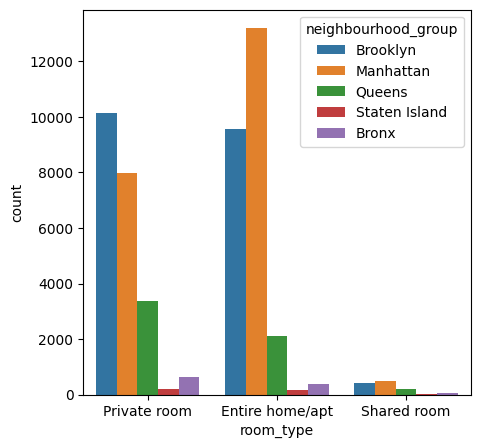

In [45]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()

- Brooklyn es la zona con más habitaciones privadas. Tiene más habitaciones privadas que casas privadas y habitaciones compartidas, al igual que Queens y Bronx
- Manhattan tiene más casas privadas y habitaciones compartidas que todos los demás

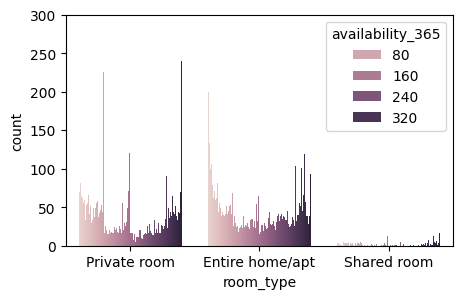

In [46]:
filtered_data = total_data[total_data["availability_365"] > 0]

fig, axis = plt.subplots(figsize = (5, 3))

sns.countplot(data = filtered_data, x = "room_type", hue = "availability_365")

axis.set_ylim(0, 300) 

plt.show()

- Las habitaciones privadas son las que tienen la mayor disponibilidad. Dentro de su grupo lo más habitual es que estén disponibles más días.
- Las casas privadas son las que tienen el mayor número de alojamientos con menos disponibilidad. Dentro de su grupo también es lo más habitual. 
- En las habitaciones compartidas lo que más hay son habitaciones disponibles más días. 

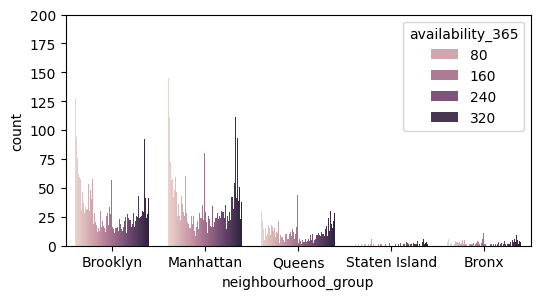

In [47]:
fig, axis = plt.subplots(figsize=(6, 3))

sns.countplot(data=filtered_data, x="neighbourhood_group", hue="availability_365", ax=axis)

axis.set_ylim(0, 200) 

plt.show()


Manhattan es la zona con mayor número alojamientos con la mayor disponibilidad y con menos, seguida de Brooklyn

### Análisis de correlaciones

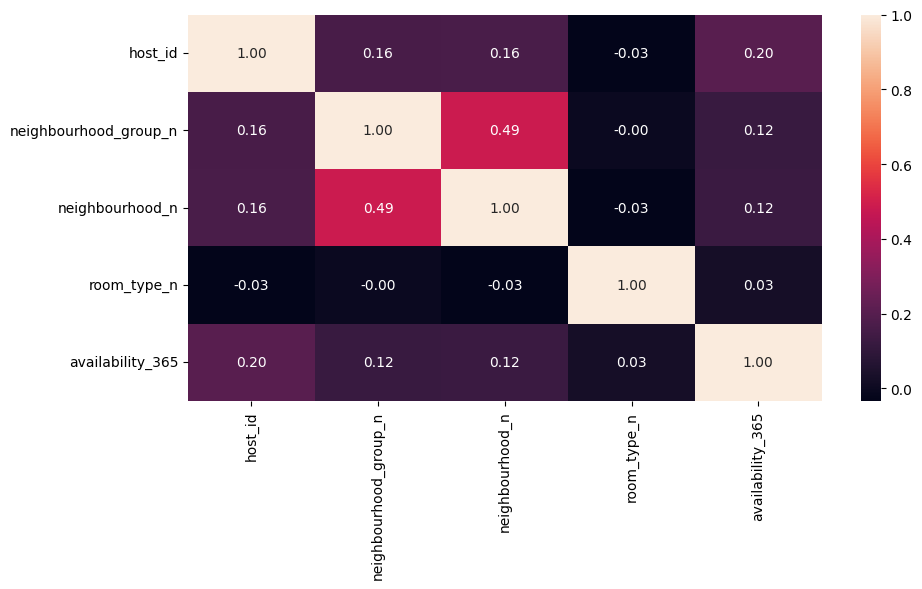

In [48]:
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["host_id", "neighbourhood_group_n" , "neighbourhood_n" , "room_type_n" , "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

No parece haber correlación entre ninguno de los datos. 

In [49]:
neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in total_data[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}
with open("neighbourhood_group_transformation_rules.json", "w") as f:
  json.dump(neighbourhood_group_transformation_rules, f)

room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in total_data[["room_type", "room_type_n"]].drop_duplicates().iterrows()}
with open("room_type_transformation_rules.json", "w") as f:
  json.dump(room_type_transformation_rules, f)

neighbourhood_transformation_rules = {row["neighbourhood"]: row["neighbourhood_n"] for _, row in total_data[["neighbourhood", "neighbourhood_n"]].drop_duplicates().iterrows()}
with open("neighbourhood_transformation_rules.json", "w") as f:
  json.dump(neighbourhood_transformation_rules, f)

# Análisis numérico - numérico
- latitude , longitude , price , minimum_nights , number_of_reviews , calculated_host_listings_count

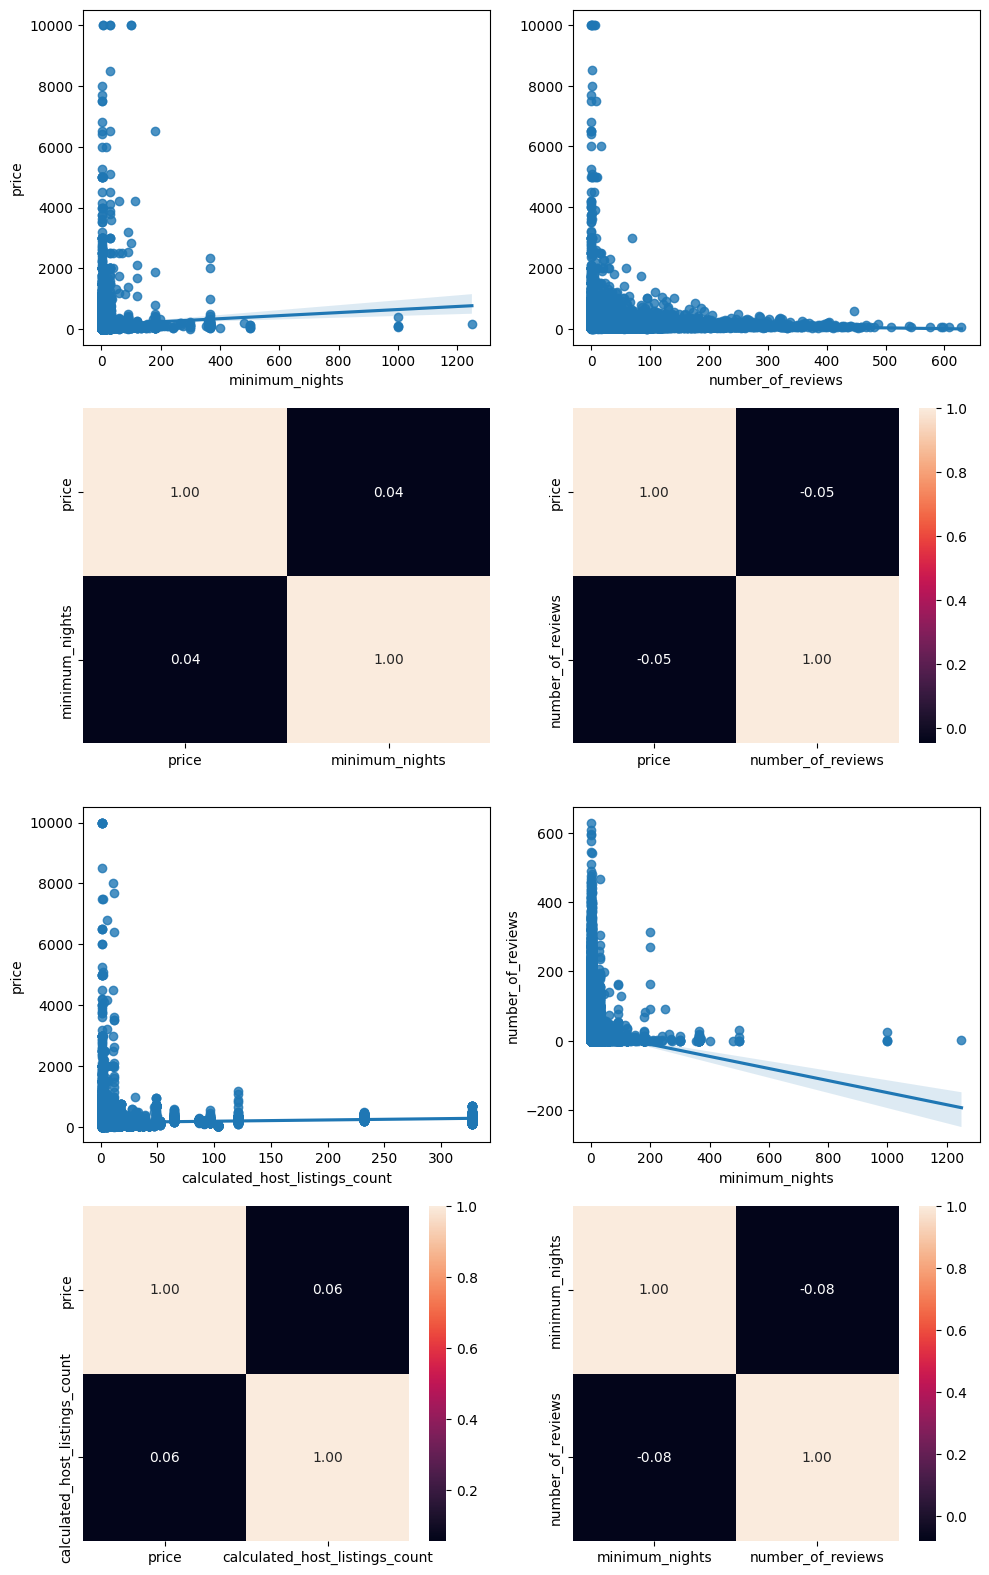

In [50]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = "price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = total_data, x = "minimum_nights", y = "number_of_reviews").set(ylabel = "number_of_reviews")
sns.heatmap(total_data[["minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

plt.tight_layout()

plt.show()

- No hay correlación entre ninguno de los pares de datos.
- Se observa que minimum_nights tiene valores muy elevados aislados que igual no tienen sentido. 

## Análisis numérico-categórico

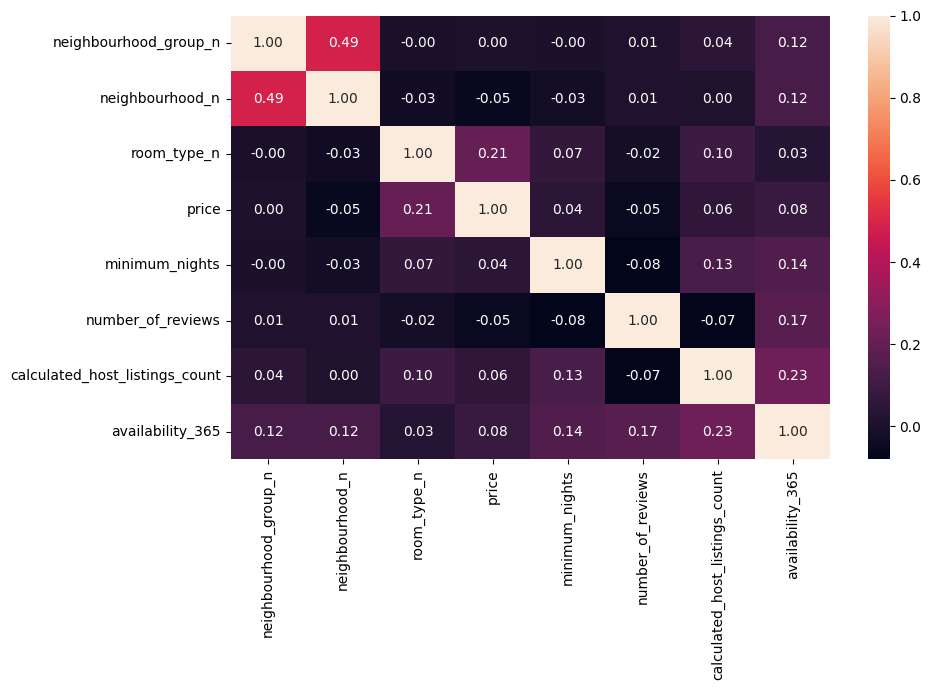

In [51]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(total_data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights", "number_of_reviews",
                         "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

No hay excesiva correlación entre ningún par de datos. Sin embargo, puede ser:
- Que el precio tenga relación con el tipo de alojamiento
- Que a mayor número de alojamientos, haya mayor disponibilidad

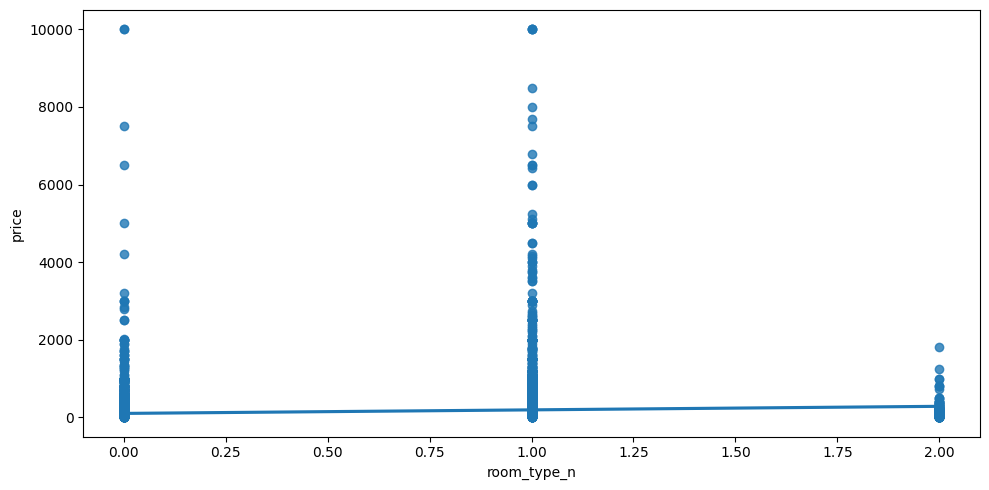

In [52]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "room_type_n", y = "price")


plt.tight_layout()

plt.show()


No parece haber excesiva correlación, la representación del precio va ligeramente hacia arriba por lo que serían de forma poco apreciable más baratas las habitaciones privadas, luego las casas enteras y por último las habitaciones compartidas. 

## Pairplot

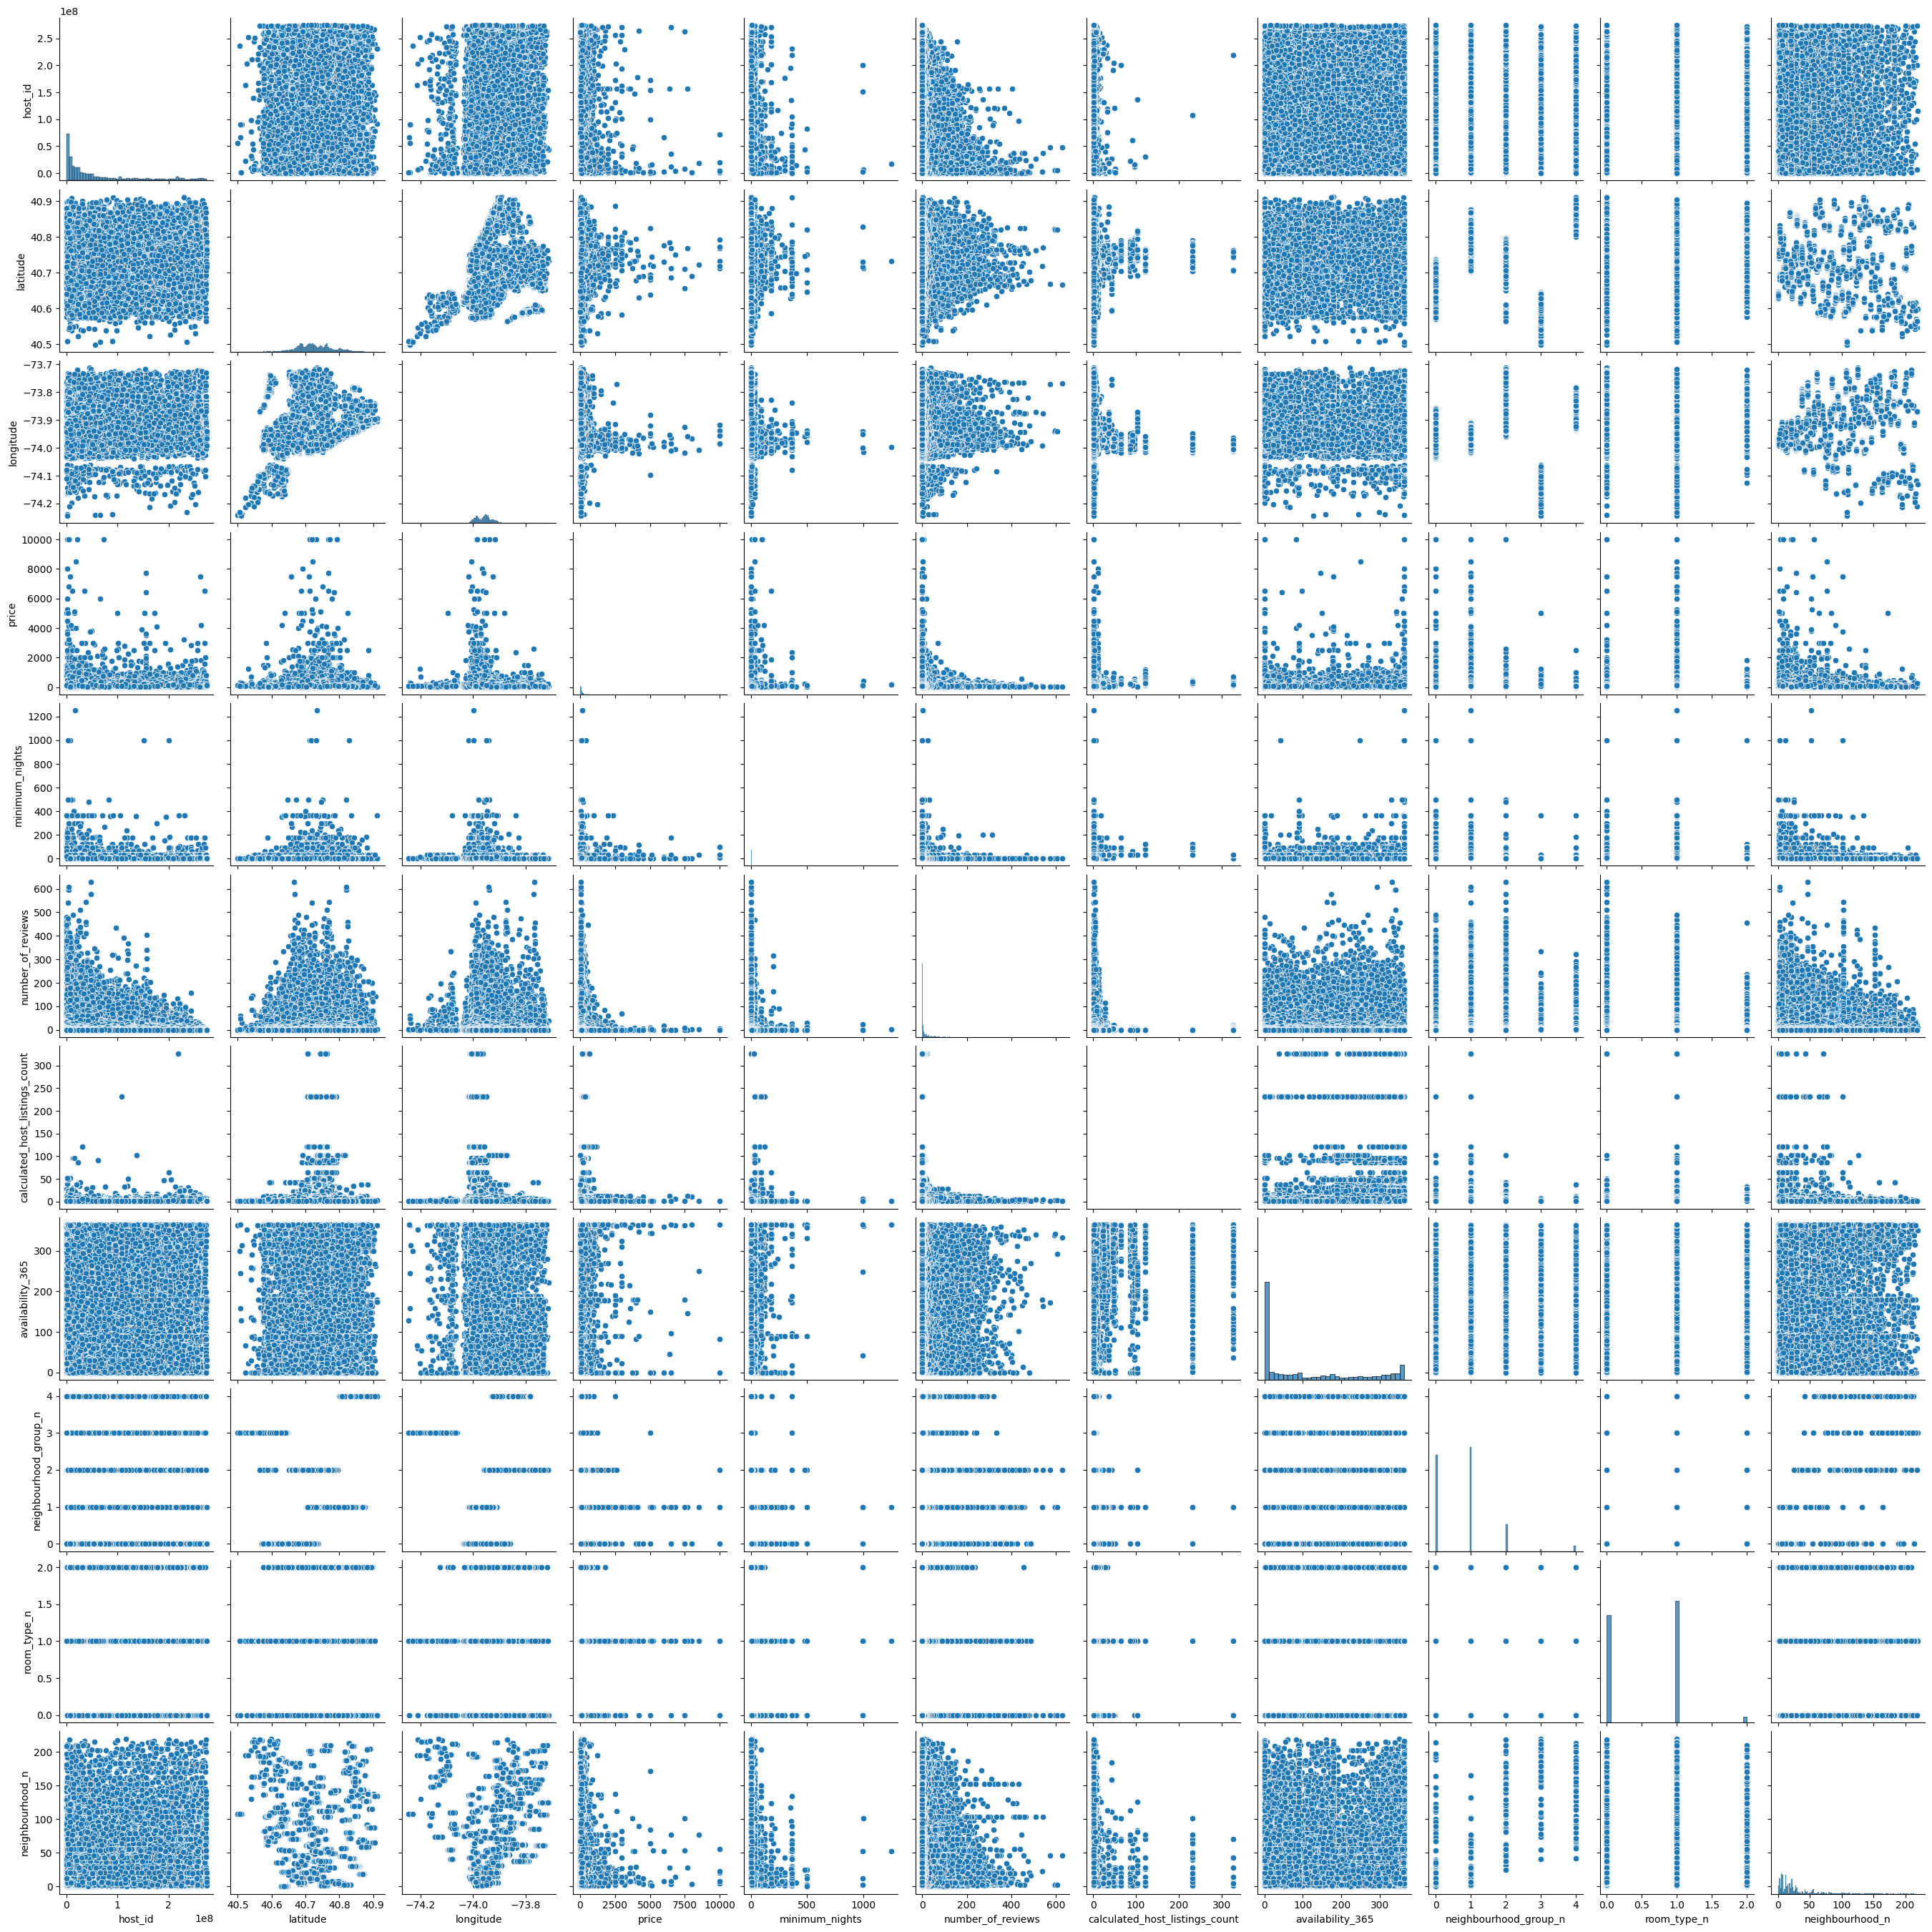

In [53]:
sns.pairplot(data = total_data)

## Paso 5: Ingeniería de características